# Lab-6.2: NetworkX

**Instructions** 

[Click here to download the notebook for this lab](lab-6.2.zip)

This notebook consists of TWO parts

(1): **Demonstration section:** The instructors will work through this section during the lab period. It is meant to be educational, with various code examples provided for you. You should understand all code in the demonstration section and should run the cells on your local machine before attempting the assignment.

(2): **Lab assignment (optional):** A short assignment section is also provided after the demonstration. You will have time to work on this during the lab but can finish it at home. 

* **Note**: It is recommended that you complete this `.ipynb` file in VS-code. Activate the `anly503` environment by selecting the kernel in the upper-left corner of VS-code.  
* **Submission:** None, lab assignments below are recommended but optional.

# Demonstration

## NetworkX installation

**MAC OR LINUX INSTRUCTIONS**

First, check which shell you're using.
From command line run
echo $SHELL

most likely it will return
/bin/zsh

If so, use zsh option below 

Run the following from command line 

* conda deactivate
* conda remove --name ANLY645 --all 
* conda create -n ANLY645 python=3.10
* conda activate ANLY645
* If using zsh shell
  * python -m pip install 'networkx[default]'
* If using sh shell 
  * python -m pip install networkx[default]
* conda install ipykernel --update-deps --force-reinstall
* conda install -c anaconda nbconvert
* conda install pandoc

## Import Network-X 

* Recall that `import` statements go at the top of your code, telling Python to load an external module. 
* In this case we want to load NetworkX, but give it a short alias `nx` 
* NOTE: Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. 
  * The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline 
  * i.e. in the notebook. This magic should be used right after the import statement.

In [182]:
import networkx as nx
%matplotlib inline

# import matplotlib.pyplot as plt

Let's check the installed version of NetworkX. Version 2 is incompatible with v1, so we want to make sure we're not using an out of date package.

In [183]:
nx.__version__

'3.0'

### A note on naming conventions

* Usually in Python, variables are named in `snake_case`, 
* i.e. lowercase with underscores separating words. 
* Classes are conventionally named in `CamelCase`, i.e. with the first letter of each word capitalized.
* Obviously NetworkX doesn't use this convention, often using single capital letters for the names of graphs. 
* This is an example of convention leaking from the world of discrete mathematics. 
* Since most of the documentation you will find online uses this convention, we will follow it as well.

## Creating graphs in NetworkX

* In the software, graphs are stored using NetworkX graph objects, commonly denoted as G

* There are several ways to create these
  * 1) Load the graph from a file into the NetworkX graph object 
  * 2) Use a graph generator 
  * 3) Build the graph up from scratch
<br/><br/>
* In the following examples we explore these different methods
* NOTE: We intentionally repeat the import statements, so that the code chunk is fully "self-contained". 
  * That way it could be copied into a regular Python file and recycled more easily
<br/><br/>

* NOTE: If the image doesn't show up in VS code then do the following 
    * click the three dots on the left of the screen. 
    * Then click "change presentation" and then select the image format instead of "text".

### Building a graph from scratch: example-1 <a id='H6'></a>

* In the following example the names of the nudes are just their indices

* The NetworkX "draw" command is built on top of MatPlotLib
  * You can think of it as a new MPL command for the special case of Network objects

<class 'networkx.classes.graph.Graph'>


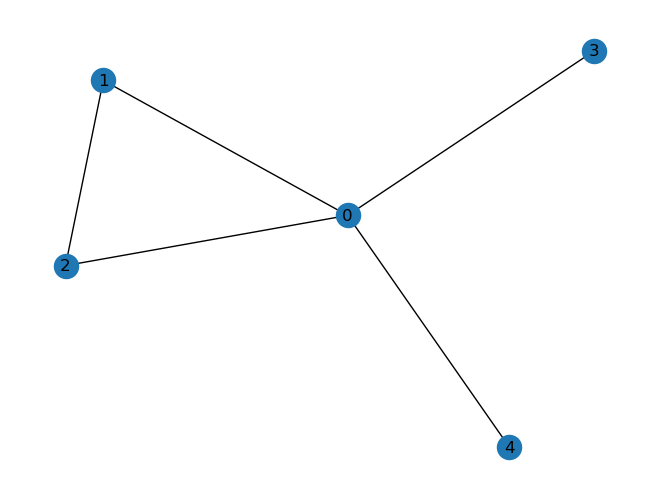

In [184]:
import networkx as nx
import matplotlib.pyplot as plt

#------------------
# INITIALIZE GRAPH OBJECT  
#------------------
G = nx.Graph()
print(type(G))

#------------------
#CREATE NODES
#------------------

# ADD ONE NODE
G.add_node(0)

# ADD SEVERAL NODES
G.add_nodes_from([1,2,3,4])

#------------------
#CREATE EDGES
#------------------

# ADD ONE EDGE
G.add_edge(0,1)

# ADD SEVERAL EDGES WITH LIST OF 2-TUPLES
G.add_edges_from([(0,2),(0,3),(0,4),(1,2)])

#------------------
# DRAW THE GRAPH
#------------------
nx.draw(G, with_labels=True)
plt.show()

### Building a graph from scratch: example-2 <a id='H7'></a>

* This example is similar to the last one, except we assign names to the nodes, in the form of strings.


<class 'networkx.classes.graph.Graph'>


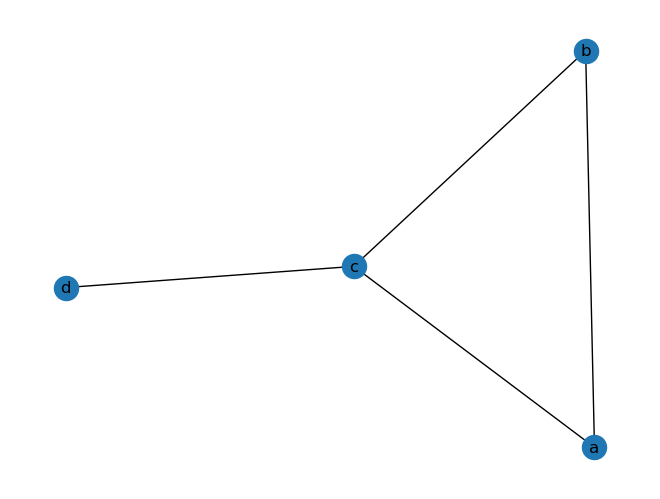

In [185]:
import networkx as nx
import matplotlib.pyplot as plt

#------------------
# INITIALIZE THE GRAPH OBJECT  
# A "PLAIN" GRAPH IS UNDIRECTED
#------------------
G = nx.Graph()
print(type(G))

#------------------
#CREATE NODES
#------------------
# GIVE EACH A NODE A 'NAME', WHICH IS A LETTER IN THIS CASE.
G.add_node('a')

# THE ADD_NODES_FROM METHOD ALLOWS ADDING NODES FROM A SEQUENCE, IN THIS CASE A LIST
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

#------------------
#CREATE EDGES
#------------------
# add edge from 'a' to 'b'
# SINCE THIS GRAPH IS UNDIRECTED, THE ORDER DOESN'T MATTER HERE
G.add_edge('a', 'b')

# JUST LIKE ADD_NODES_FROM, WE CAN ADD EDGES FROM A SEQUENCE
# EDGES SHOULD BE SPECIFIED AS 2-TUPLES
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

#------------------
# DRAW THE GRAPH
#------------------
nx.draw(G, with_labels=True)
plt.show()

There are many optional arguments to the draw function to customize the appearance.

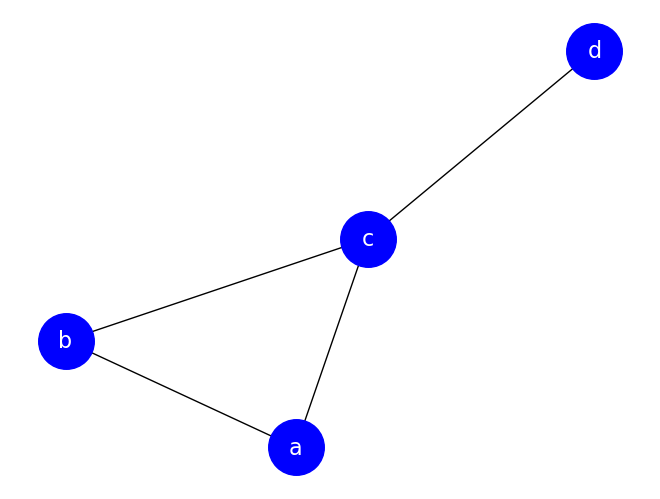

In [186]:
#CUSTOMIZE THE GRAPH A BIT
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

### Node names <a id='H8'></a>

* The node names don't have to be single characters or integers
  * They can be strings or integers or any immutable object, and the types can be mixed. 
  * The example below uses strings and integers for names.

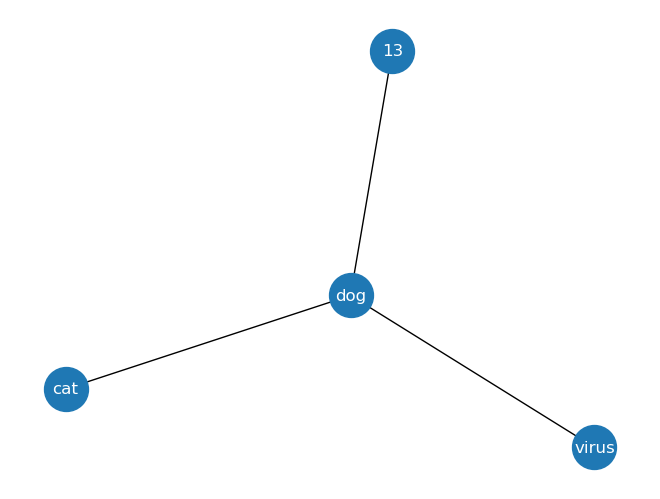

In [187]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')
G.add_edge('virus','dog')
G.add_edge(13,'dog')


nx.draw(G, with_labels=True, font_color='white', node_size=1000)

### Building a graph using a graph generator: 

* NetworkX many built in network generators
  
  * for more see the following link  https://networkx.org/documentation/stable/reference/generators.html


Complete graph: i.e. fully connected 


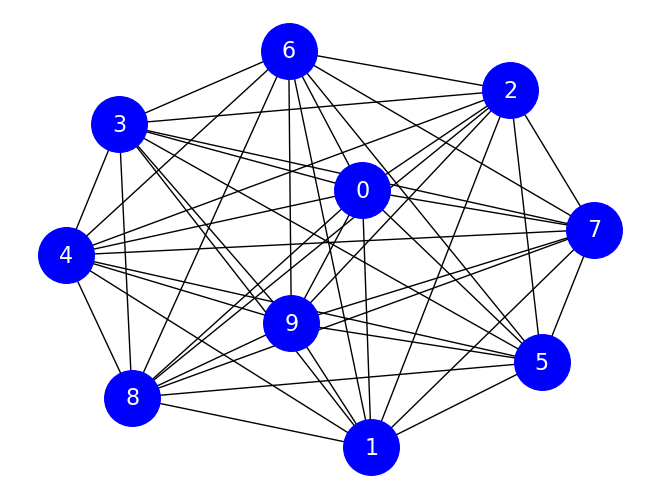

Binomial tree network


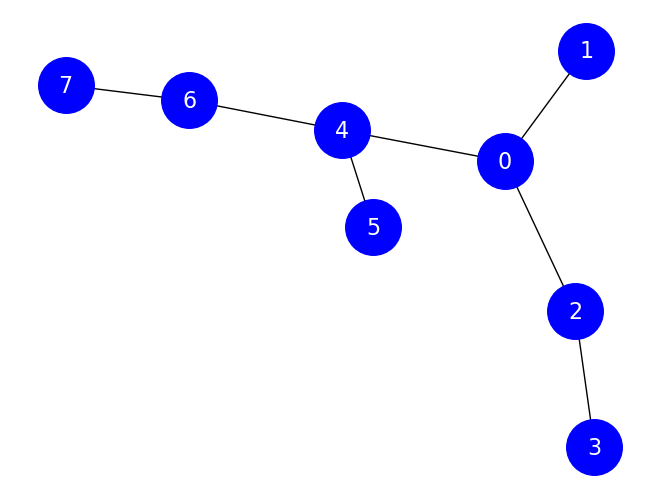

Star graph


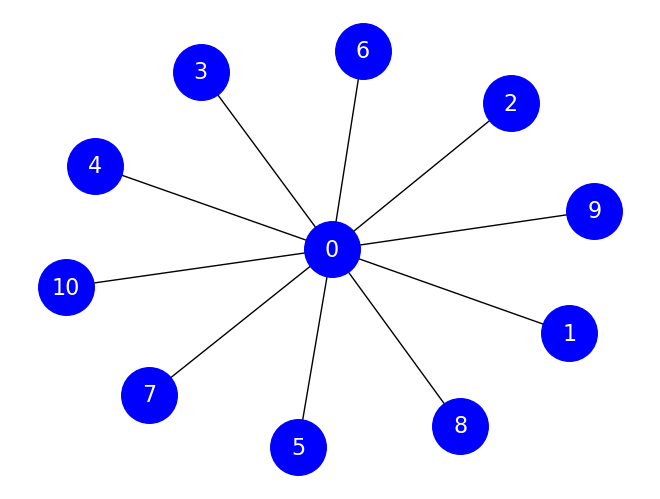

hexagonal_lattice_graph


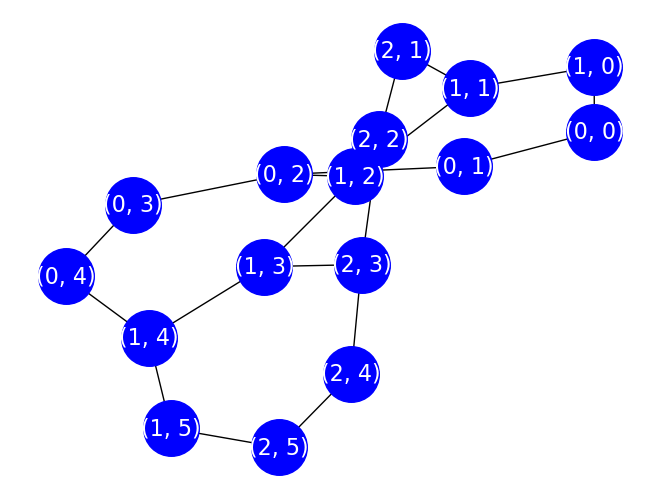

karate_club_graph


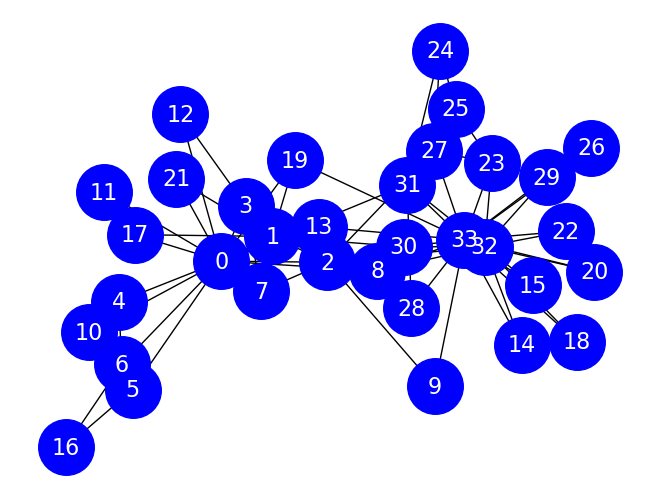

In [188]:
import networkx as nx
import matplotlib.pyplot as plt

#FUNCTION FOR NETWORK PLOTTING 
def draw_network(G):
    #CUSTOMIZE GRAPH A BIT
    nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )
    plt.show()

#GENERATE SEVERAL NETWORKS AND PLOT 
N=10

print("Complete graph: i.e. fully connected ")
G = nx.complete_graph(N)
draw_network(G)

print("Binomial tree network")
G = nx.binomial_tree(3)
draw_network(G)

print("Star graph")
G = nx.star_graph(N)
draw_network(G)

print("hexagonal_lattice_graph")
G = nx.hexagonal_lattice_graph(2,2)
draw_network(G)

print("karate_club_graph")
G = nx.karate_club_graph()
draw_network(G)


## Adjacency lists 

One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:
```
a d e
b c
c
d
e
```
the edges are as follows:
```
(a, d)
(a, e)
(b, c)
```
The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

In the `datasets` directory, there is a file called `friends.adjlist`. It's a plain text file, so you can open it on your computer or in GitHub, but here are its contents:

In [189]:
print(open('friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph SG, for social graph.

In [190]:
SG = nx.read_adjlist('friends.adjlist')

We know how to draw this graph:

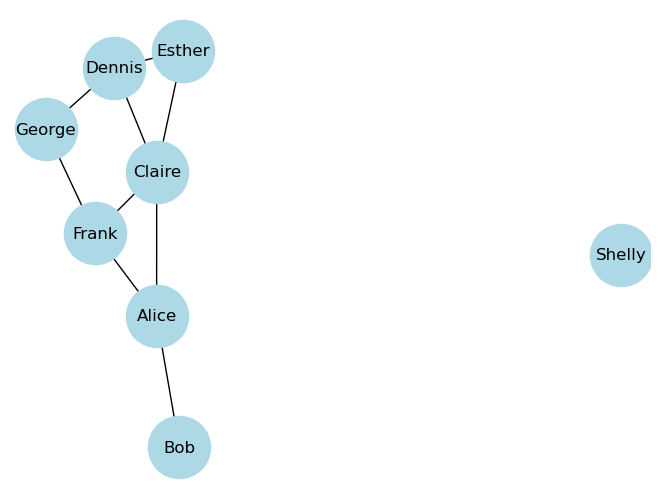

In [191]:
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True)

And we know how to get information such as the number of friends linked from a node:

In [192]:
SG.degree('Alice')

3

## Methods of the NetworkX graph object class 

The graph object has some properties and methods giving data about the whole graph.

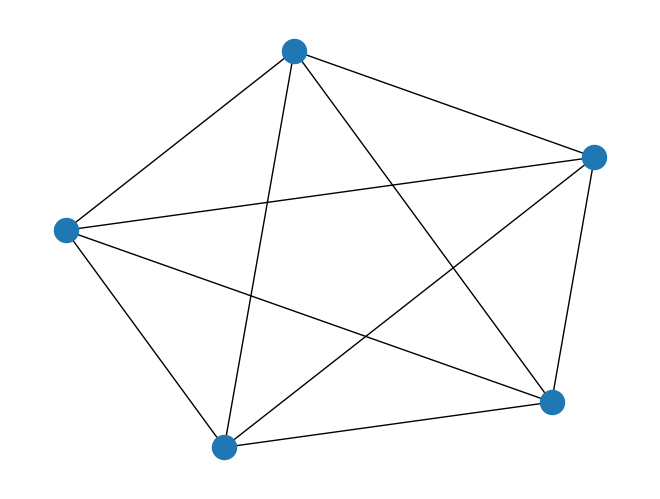

In [193]:
# CREATE A COMPLETE GRAPH
G = nx.complete_graph(5)
nx.draw(G)

In [194]:
# List all of the nodes
print(G.nodes())

[0, 1, 2, 3, 4]


In [195]:
# List all of the edges
print(G.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


NodeView and EdgeView objects have iterators, so we can use them in `for` loops:

In [196]:
for node in G.nodes:
    print(node)

0
1
2
3
4


In [197]:
for edge in G.edges:
    print(edge)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


Note that the edges are given as 2-tuples, the same way we entered them.

We can get the number of nodes and edges in a graph using the `number_of_` methods.

In [198]:
print(G.number_of_nodes())

5


In [199]:
print(G.number_of_edges())

10


Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [200]:
for neighbor in G.neighbors(0):
    print(neighbor)

1
2
3
4


and you can always use the `list` constructor to make a list from an iterator:

In [201]:
list(G.neighbors(1))

[0, 2, 3, 4]

## NetworkX functions vs. Graph methods <a id='H12'></a>

The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [202]:
nx.is_tree(G)

False

In [203]:
nx.is_connected(G)

True

## Node and edge existence <a id='H13'></a>

To check if a node is present in a graph, you can use the `has_node()` method:

In [204]:
G.has_node(0)

True

In [205]:
G.has_node('x')

False

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [206]:
1 in G.nodes

True

Likewise we can check if two nodes are connected by an edge:

In [207]:
G.has_edge('a', 'b')

False

In [208]:
G.has_edge(0, 1)

True

In [209]:
(0,1) in G.edges

True

## Node degree <a id='H14'></a>

* One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. 
  
* Using the `.neighbors()` method from above, we could formulate this question as so:

In [210]:
len(list(G.neighbors(0)))

4

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [211]:
G.degree(0)

4

## Aside: comprehensions <a id='H15'></a>

* Often we have one sequence of values and we want to generate a new sequence by applying an operation to each item in the first.
* List comprehensions and generator expressions are compact ways to do this.
* List comprehensions are specified inside square brackets, and immediately produce a list of the result.

In [212]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In the context of NetworkX, this is often used to do something with the node or edge lists:

In [213]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

[0, 1, 2, 3, 4]
[4, 4, 4, 4, 4]


Generator expressions are slightly different as they are evaluated [lazily](https://en.wikipedia.org/wiki/Lazy_evaluation). These are specified using round braces, and if they are being expressed as a function argument, they can be specified without any braces. These are most often used in the context of aggregations like the `max` function:

In [214]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [215]:
max(len(item) for item in items)

6

In [216]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

## Directed graphs <a id='H16'></a>

Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.

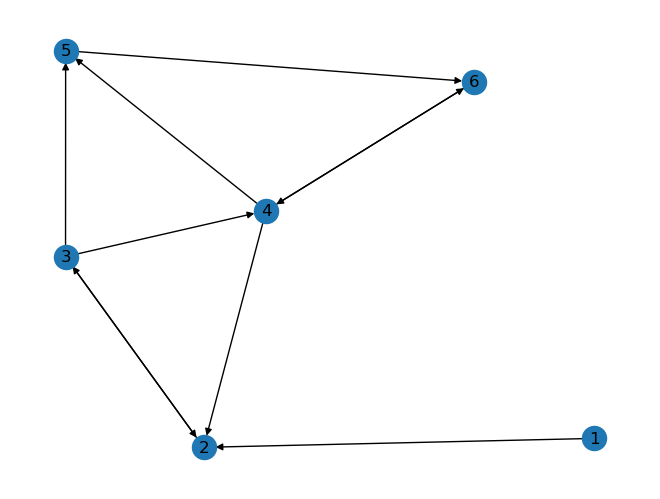

In [217]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:

In [218]:
D.has_edge(1,2)

True

In [219]:
D.has_edge(2,1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

In [220]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:

In [221]:
D.in_degree(2)

3

In [222]:
D.out_degree(2)

1

### Caveat 

Since NetworkX 2, the `.degree()` method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the `neighbors` method is a synonym for `successors`, giving only the edges originating from the given node. This makes sense if you consider `neighbors` to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing `.neighbors()` in your code when you really want both predecessors and successors.

In [223]:
D.degree(2)

4

In [224]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]


# Visualization  

## Customizing a plot: Example-1  

 In the following self-contained example we show how to add various customization options to a plot

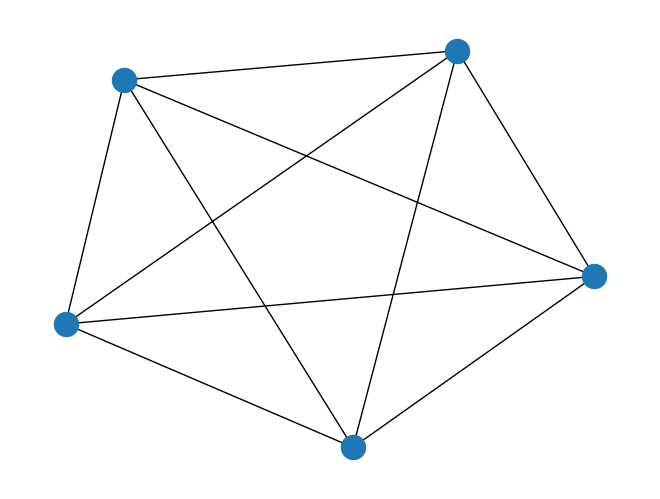

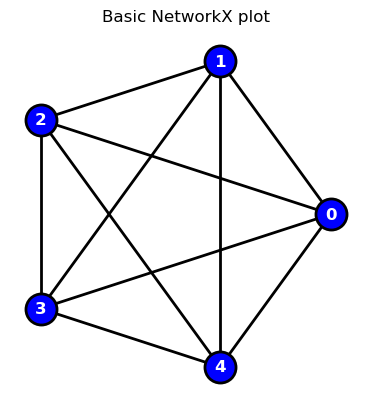

In [225]:
import networkx as nx
import matplotlib.pyplot as plt

#GENERATE GRAPH
G = nx.complete_graph(5)

#BASIC PLOT
nx.draw(G)
plt.show()

#CUSTOMIZE
#specifiy x-y positions for plotting
pos=nx.circular_layout(G)

#initialize plot
fig, ax = plt.subplots()
nx.draw(
G,
node_color='blue',
edgecolors="black",
edge_color="black", 
linewidths=2,
font_color="white",
font_weight="bold",
node_size=500,
width=2,
with_labels=True,
pos=pos,
ax=ax
)
ax.set(title='Basic NetworkX plot')
ax.set_aspect('equal', 'box')
#fig.savefig("test.png")
plt.show()

## Customizing a plot: Example-2  

 In the following self-contained example we show how to add various customization options to a `NetworkX` plot

(0, {'attribute': 0.23403298070102646})
(1, {'attribute': 1.198884220902181})
(2, {'attribute': 0.41056289173842914})
(3, {'attribute': 0.9915691434505753})
(4, {'attribute': 0.33730437363146387})
(5, {'attribute': 0.4084896376240765})
(6, {'attribute': 1.027427718118034})
(7, {'attribute': 0.2875961909581663})
(8, {'attribute': 1.0333278855474304})
(9, {'attribute': 1.0868484574385862})
(10, {'attribute': 0.25043509384606527})
(11, {'attribute': 0.2958260992822784})
(12, {'attribute': 0.6257612260356327})
(13, {'attribute': 0.8122915354937861})
(14, {'attribute': 0.8455361251905384})
(15, {'attribute': 1.1181497412562629})
(16, {'attribute': 1.0486664038663573})
(17, {'attribute': 0.6186328622887218})
(18, {'attribute': 0.5086943689268126})
(19, {'attribute': 0.4955998629692416})
0 14 {'weight': 3.7453755007534744}
1 14 {'weight': 2.8861716023934254}
2 9 {'weight': 2.06400014958788}
2 11 {'weight': 2.3632588896721374}
3 9 {'weight': 3.501696408686436}
3 12 {'weight': 2.181343593453154

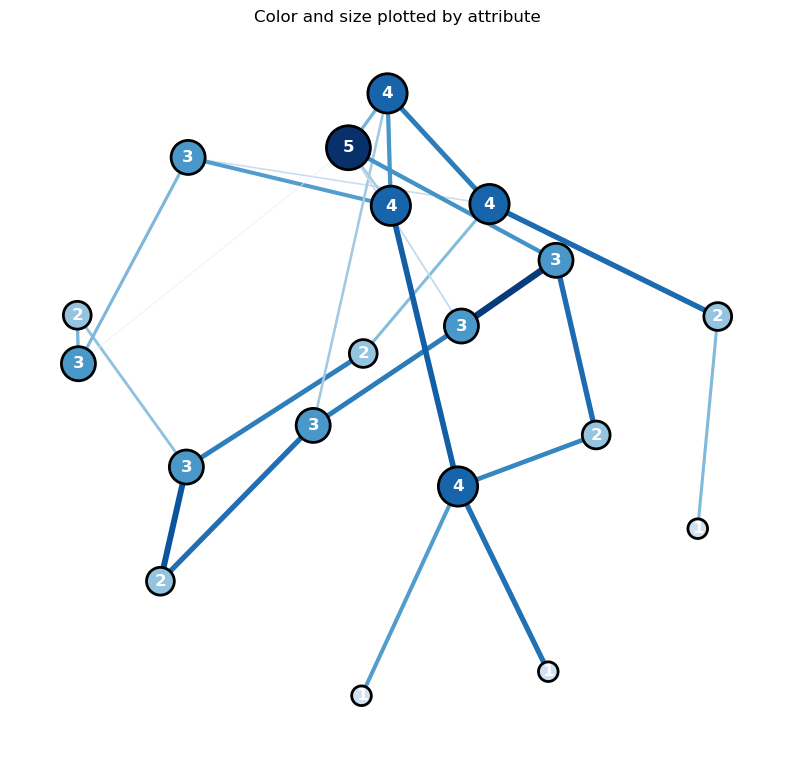

In [226]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

#GENERATE GRAPH
N=20

G = nx.complete_graph(N)
G = nx.gnp_random_graph(N, 0.1, seed=10374196)

#ASSIGN RANDOM ATTRIBUTES TO NODES+EDGES
for u in G.nodes():	G.nodes[u]['attribute']=0.2+1*random.uniform(0, 1) 
for u,v in G.edges(): G[u][v]['weight']=5*random.uniform(0, 1) 

#PRINT NODE+EDGES
for node in G.nodes(data=True): print(node)
for line in nx.generate_edgelist(G, data=True): print(line)

#SPECIFIY X-Y POSITIONS FOR PLOTTING
# pos=nx.circular_layout(G)
pos=nx.spring_layout(G,k=50*1./np.sqrt(N),iterations=500)
# pos=nx.random_layout(G)

#GENERATE PLOT
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

#assign colors based on attributes
weights_n 	= [G.nodes[u]['attribute'] for u in G.nodes()]
weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

#SAMPLE CMAP FOR COLORS 
cmap=plt.cm.get_cmap('Blues')
colors_e 	= [cmap(G[u][v]['weight']/5.0) for u,v in G.edges()]
colors_n 	= [cmap(G.nodes[u]['attribute']/1.2) for u in G.nodes()]

#VARIOUS METHODS FOR VISUALIZING SIZE

#LABELS (DICT)
labels={}
for n,d in nx.degree(G): labels[n]=d #str(n)+"-"+str(d) 

#WEIGHTS
# node_size=1000*weights_n

#DEGREE CENTRALITY
centrality=nx.degree(G)
centrality=np.array([d for n,d in centrality]); #print(G_DEGREE)
node_size=1000*centrality/max(centrality)
colors_n = node_size
colors_n = [cmap(u/max(centrality)) for u in centrality]

#PLOT
nx.draw(
G,
	node_color=colors_n,
	edgecolors="black",
	edge_color=colors_e,
	linewidths=2,
	labels=labels,
	font_color="white",
	font_weight="bold",
	node_size=node_size, 
	width=weights_e,
	with_labels=True,
	pos=pos,
	ax=ax
)

#TITLE 
ax.set(title='Color and size plotted by attribute')
ax.set_aspect('equal', 'box')

#PLOT
# fig.savefig("test.png")
plt.show()

## Node degree histogram  

* A node degree histogram is a graphical representation of the frequency distribution of the degrees of nodes in a network. 
* The x-axis shows the node degrees, and the y-axis displays the number of nodes with that degree.
* It helps visualize the connectivity pattern of a network, such as the presence of hubs or the degree distribution.

RANDOM GRAPH


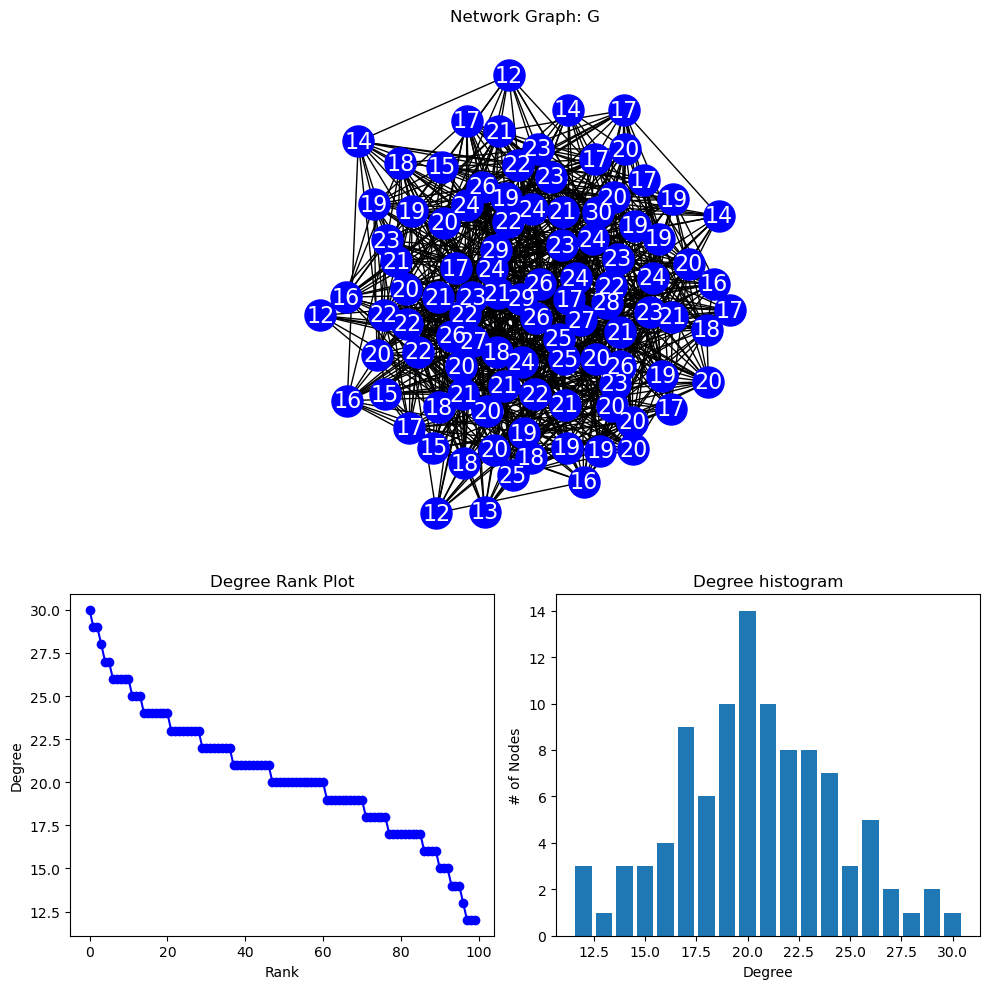

NETWORK DENSITY: 0.20646464646464646 
 NETWORK DIAMETER: 3 

COMPLETE GRAPH


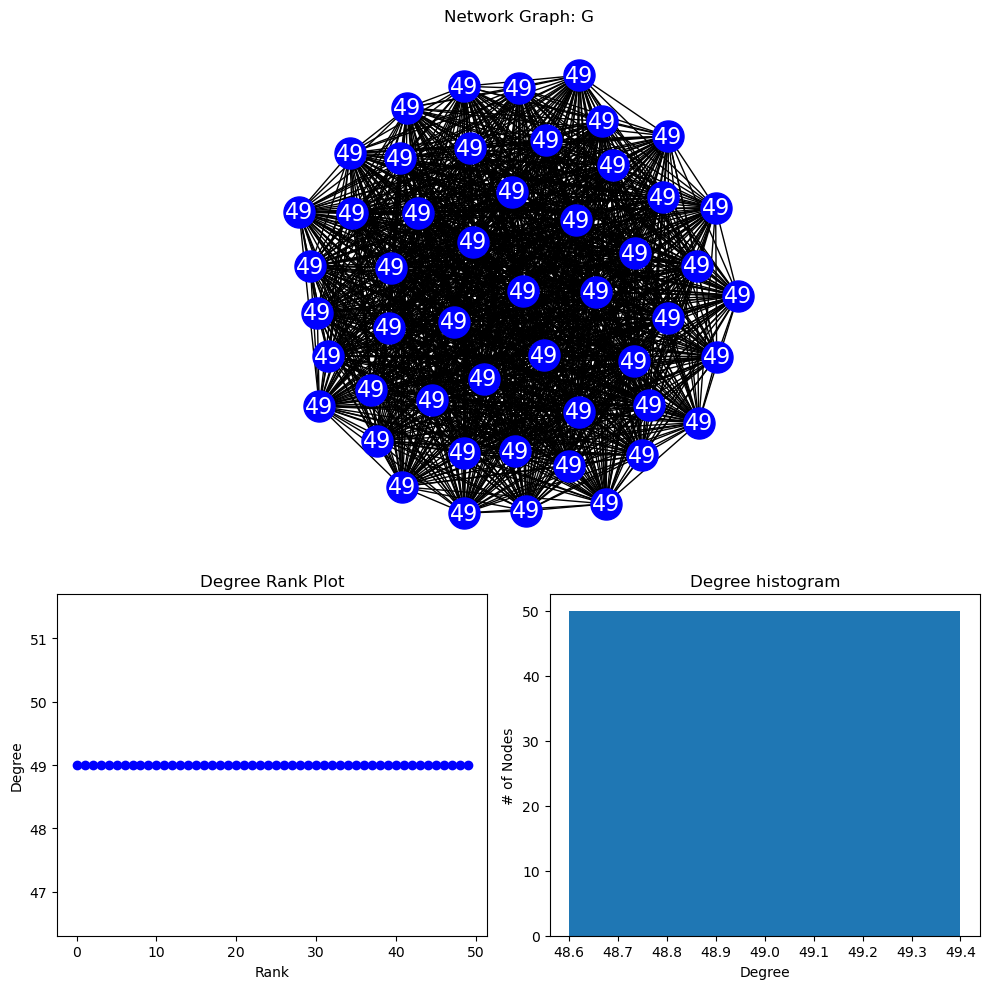

NETWORK DENSITY: 1.0 
 NETWORK DIAMETER: 1 

BINOMIAL TREE


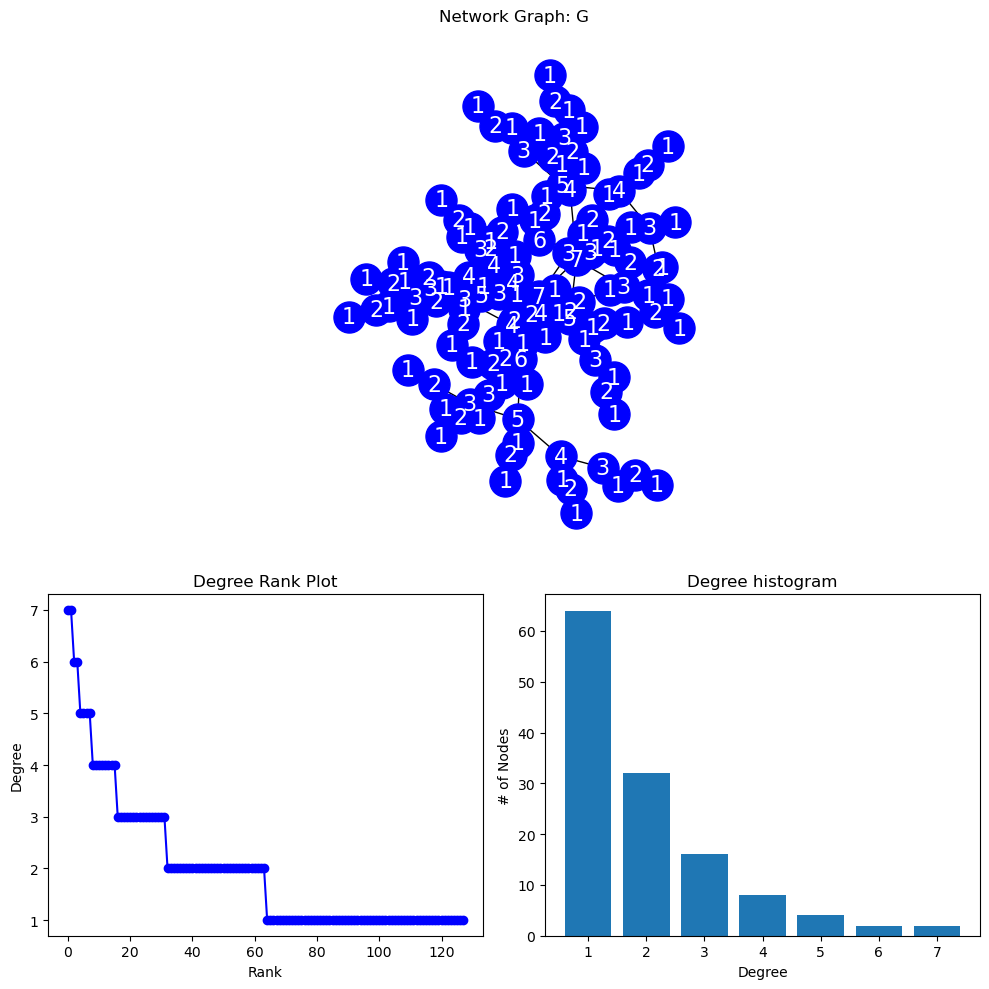

NETWORK DENSITY: 0.015625 
 NETWORK DIAMETER: 13 



In [227]:
# MODIFIED FROM 
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#-------------------
# PLOTTING FUNCTION
#-------------------
def degree_histogram_plot(G):
    #COMPUTE DEGREE: --> "LIST" WITH NODE DEGREES
    G_DEGREE=G.degree(); #print(G_DEGREE,G_DEGREE[5],type(G_DEGREE)) 

    #LABELS (DICT)
    labels={}
    for n,d in G_DEGREE: labels[n]=d #str(n)+"-"+str(d) 

    #SORT DEGREE AND STORE IN LIST 
    degree_sequence = sorted((d for n, d in G_DEGREE), reverse=True)
    dmax = max(degree_sequence)   #MAX DEGREE

    #INITIALIZE MPL FIGURE+AX
    fig = plt.figure("Degree of a random graph", figsize=(10, 10))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    #PLOT NETWORK IN UPPER GRID SPACES 
    ax0 = fig.add_subplot(axgrid[0:3, :])
    pos = nx.spring_layout(G)
    nx.draw(G,
        with_labels=True,
        labels=labels,
        node_color='blue',
        node_size=500,
        font_color='white',
        font_size=16,
        pos=pos,ax=ax0
        )
    ax0.set_title("Network Graph: G")

    #PLOT RANK (IMPORTANCE BASED ON DEGREE) VS DEGREE)
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    #PLOT RANK HISTOGRAM
    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")
    ax0.set_aspect('equal', 'box')
    fig.tight_layout()
    plt.show()

    print(
    "NETWORK DENSITY:", nx.density(G), "\n",
	"NETWORK DIAMETER:", nx.diameter(G), "\n",
    )

#-------------------
#GENERATE GRAPHS+PLOT
#-------------------
print("RANDOM GRAPH")
#gnp_random_graph(n, p=, seed=None, directed=False)
#p=connection probablity
G = nx.gnp_random_graph(100, 0.2, seed=10374196)
degree_histogram_plot(G)

print("COMPLETE GRAPH")
G = nx.complete_graph(50)
degree_histogram_plot(G)

print("BINOMIAL TREE")
G = nx.binomial_tree(7)
degree_histogram_plot(G)


## Graph Layouts  

* A graph visualization layout arranges nodes and edges in a visually intuitive manner. 
* Examples include hierarchical trees with parent-child relationships, force-directed layouts where nodes repel each other, and circular layouts that arrange nodes in a circle.
* In the following example the code explores various Network-X positional layouts

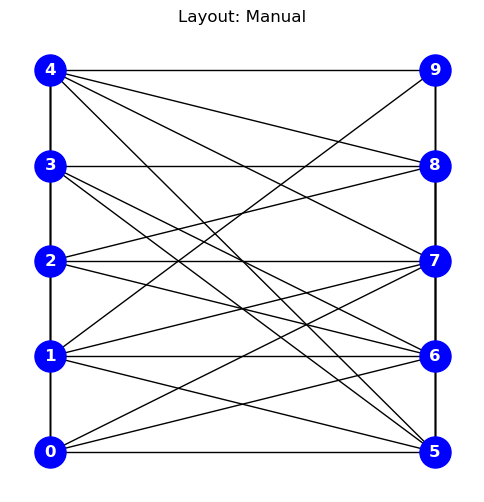

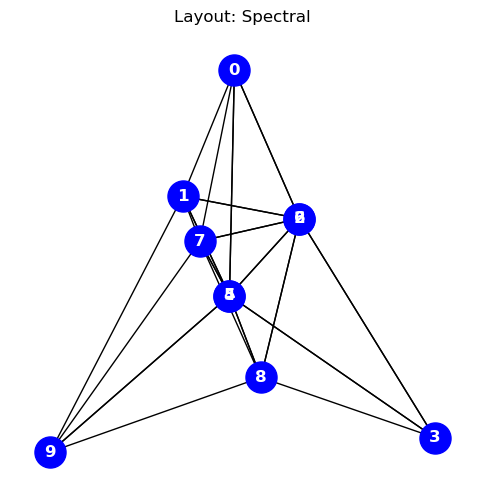

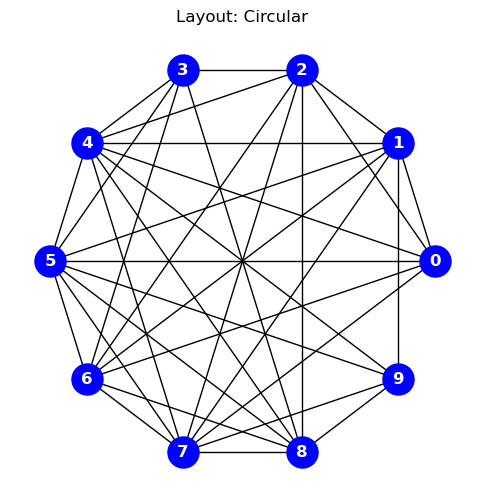

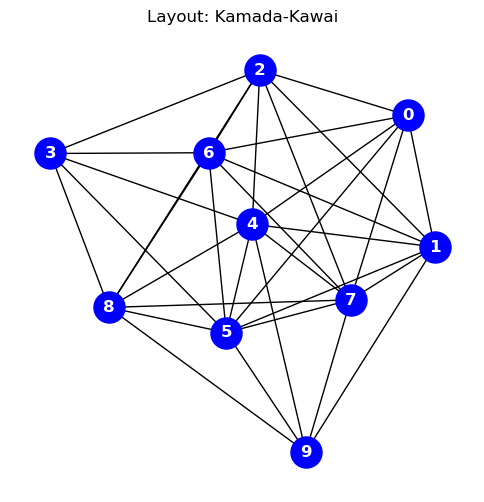

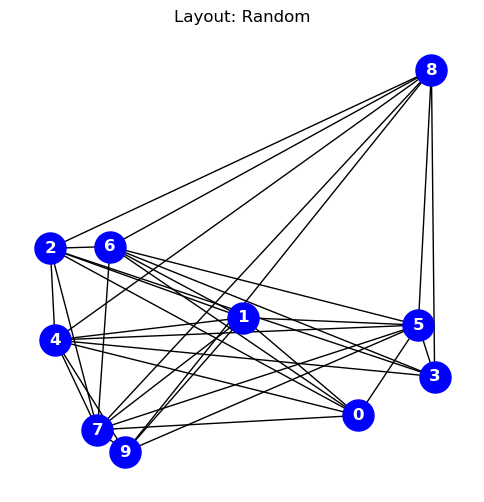

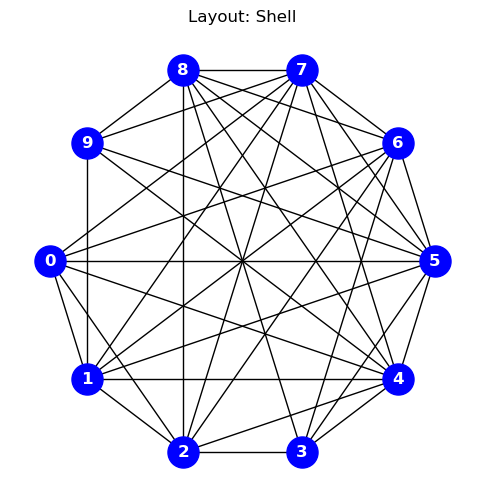

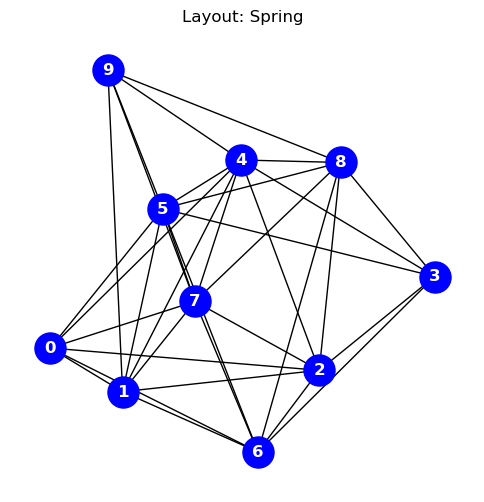

In [228]:
import networkx as nx
import matplotlib.pyplot as plt

#GENERATE A COMPLETE GRAPH USING A GRAPH GENERATOR 
#https://networkx.org/documentation/stable/reference/generators.html
# G = nx.complete_graph(10)
G = nx.gnp_random_graph(10,p=0.7)
for i in range(1,7+1):
    #print(i)
    #CAN MANUALLY SPECIFY GRAPH LOCATIONS WITH A DICTIONARY OF (X,Y) ARRAYS 
    if(i==1): 
        title="Layout: Manual"; pos={}; j=0; i1=0
        for k in range(0,len(list(G.edges))):
            if(k%5==0): j=j+1
            if(k%5==0): i1=0
            i1=i1+1
            pos[k]=[j,i1]

    # OR YOU CAN USE ONE OF NETWORK-X'S BUILT-IN POSITION LAYOUT ALGORITHMS
    if(i==2): title="Layout: Spectral";     pos = nx.spectral_layout(G)
    if(i==3): title="Layout: Circular";     pos = nx.circular_layout(G)
    if(i==4): title="Layout: Kamada-Kawai"; pos = nx.kamada_kawai_layout(G)
    if(i==5): title="Layout: Random";       pos = nx.random_layout(G)
    if(i==6): title="Layout: Shell";        pos = nx.shell_layout(G)
    if(i==7): title="Layout: Spring";       pos = nx.spring_layout(G,iterations=200)


    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    nx.draw(
        G,
        node_color="blue",
        node_size=500,
        font_color="white",
        font_weight="bold",
        with_labels=True,
        pos=pos,
    )
    ax.set(title=title)
    # if(i>1): ax.set_aspect('equal', 'box')
    plt.title(title)
    plt.show()


# Lab assignment (optional)

## Q1
* Often in the context of trees, a node with degree 1 is called a *leaf*. 
* Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [229]:
def get_leaves(G):
	print("PUT YOUR SOLUTION HERE")




PUT YOUR SOLUTION HERE


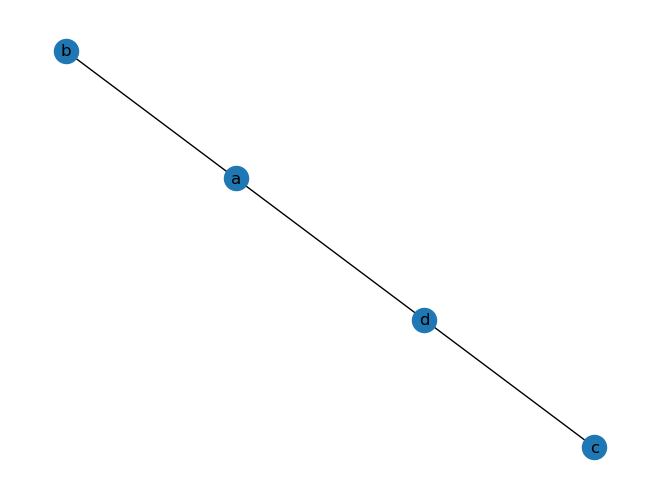

In [230]:
#TEST YOUR SOLUTION WITH THE FOLLOWING CODE
G = nx.Graph()
G.add_edges_from([
    ('a', 'b'),
    ('a', 'd'),
    ('c', 'd'),
])
nx.draw(G,with_labels=True)
get_leaves(G)
# assert set(get_leaves(G)) == {'c', 'b'}


## Q2

* Write a function named "network_analyzer" that takes a NetworkX graph object as an argument and prints the following 
  * NUMBER OF NODES
  * NUMBER OF EDGES
  * NETWORK DENSITY
  * NETWORK RADIUS
  * ADJACENCY MATRIX
  * INCIDENCE MATRIX
  * ADJACENCY LIST
  * EDGELIST
  * AVERAGE DEGREE 
  * Also use the degree_histogram_plot(G) function from above to visualize the network


In [231]:
def network_analyzer(G):
	print("PUT YOUR SOLUTION HERE")

COMPLETE GRAPH


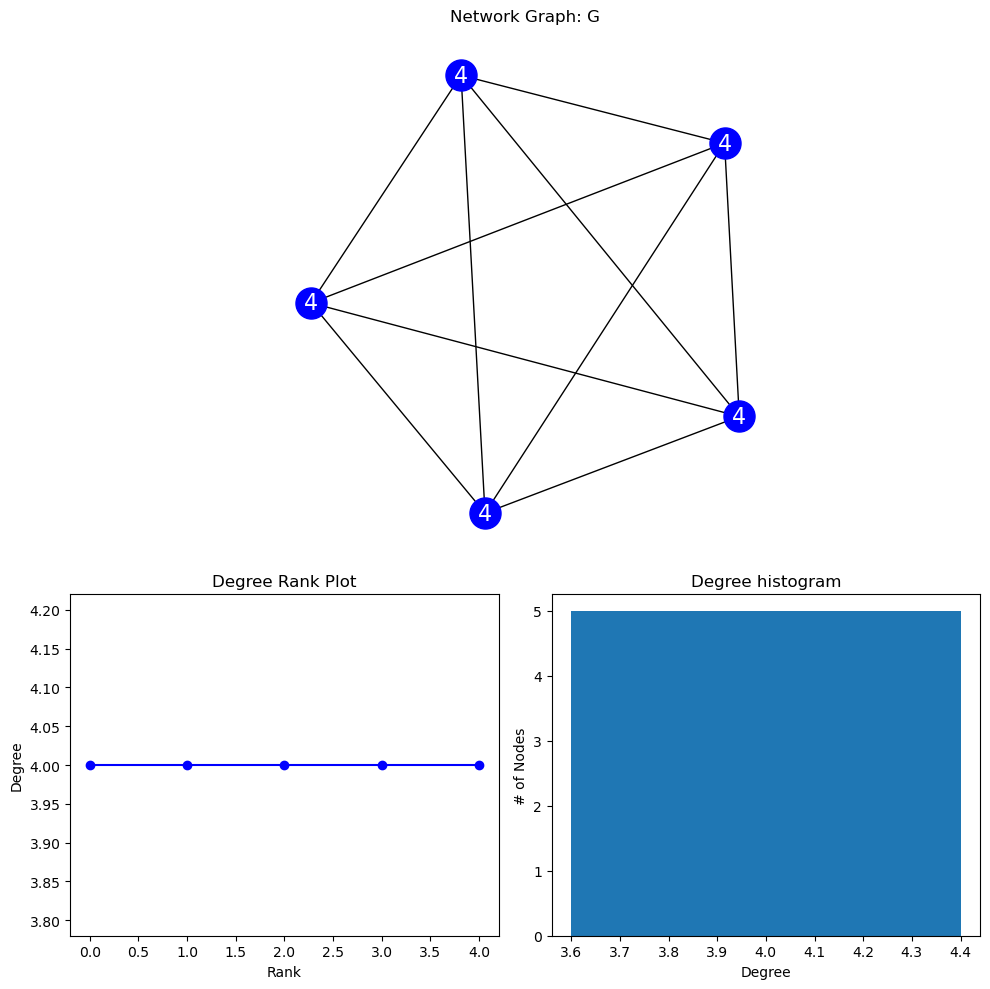

NETWORK DENSITY: 1.0 
 NETWORK DIAMETER: 1 

PUT YOUR SOLUTION HERE


In [232]:
#TEST YOUR SOLUTION WITH THE FOLLOWING CODE
print("COMPLETE GRAPH")
G = nx.complete_graph(5)
degree_histogram_plot(G)
network_analyzer(G)


## Q3

Write a function `mutual_friends` that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph `SG` drawn above,

    mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in `SG` drawn above.

In [233]:
def mutual_friends(G, node_1, node_2):
    print("PUT YOUR SOLUTION HERE")

In [234]:
SG = nx.read_adjlist('friends.adjlist')
# assert mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
# assert mutual_friends(SG, 'George', 'Bob') == []
# assert sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']